In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv', header=None)

In [3]:
df.head(5)

,0,1,2,3,4,5,6,7,8
0,2024-05-24,10178,Green Smart Shirts Ltd.,69956,Frutika Mango Drink 1000 Ml,154,Family Pack,1.0,95.0
1,2024-05-24,10178,Green Smart Shirts Ltd.,57768,Egg 12 PC,151,Egg,1.0,150.0
2,2024-05-24,10178,Green Smart Shirts Ltd.,57768,Egg 12 PC,151,Egg,1.0,150.0
3,2024-05-24,10178,Green Smart Shirts Ltd.,57768,Egg 12 PC,151,Egg,1.0,150.0
4,2024-05-24,10178,Green Smart Shirts Ltd.,57768,Egg 12 PC,151,Egg,3.0,450.0


In [4]:
df.columns = ['date', 'outlet_id', 'outlet', 'Item_code', 'Item_Name', 'Sub_cat_id', 'sub_category_name', 'Quantity', 'Price']


In [5]:
df.head(5)

,date,outlet_id,outlet,Item_code,Item_Name,Sub_cat_id,sub_category_name,Quantity,Price
0,2024-05-24,10178,Green Smart Shirts Ltd.,69956,Frutika Mango Drink 1000 Ml,154,Family Pack,1.0,95.0
1,2024-05-24,10178,Green Smart Shirts Ltd.,57768,Egg 12 PC,151,Egg,1.0,150.0
2,2024-05-24,10178,Green Smart Shirts Ltd.,57768,Egg 12 PC,151,Egg,1.0,150.0
3,2024-05-24,10178,Green Smart Shirts Ltd.,57768,Egg 12 PC,151,Egg,1.0,150.0
4,2024-05-24,10178,Green Smart Shirts Ltd.,57768,Egg 12 PC,151,Egg,3.0,450.0


In [6]:
print(df.isnull().sum())

date                  0
outlet_id             0
outlet               55
Item_code             0
Item_Name             0
Sub_cat_id            0
sub_category_name     0
Quantity              0
Price                 0
dtype: int64


In [7]:
df = df.dropna()

In [8]:
print(df.isnull().sum())

date                 0
outlet_id            0
outlet               0
Item_code            0
Item_Name            0
Sub_cat_id           0
sub_category_name    0
Quantity             0
Price                0
dtype: int64


In [9]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])


In [10]:
# Descriptive statistics
print(df.describe())


          outlet_id     Item_code    Sub_cat_id      Quantity         Price
count  1.524875e+06  1.524875e+06  1.524875e+06  1.524875e+06  1.524875e+06
mean   1.023030e+04  1.065131e+05  1.557888e+02  2.783107e+00  2.394246e+02
std    2.907808e+01  8.172267e+05  5.004482e+01  4.255576e+01  1.491113e+03
min    1.017700e+04  5.523900e+04  3.200000e+01 -2.290000e+02 -9.600000e+03
25%    1.021600e+04  5.787600e+04  1.460000e+02  1.000000e+00  5.300000e+01
50%    1.022300e+04  5.869000e+04  1.620000e+02  1.000000e+00  1.200000e+02
75%    1.025700e+04  6.941900e+04  1.980000e+02  1.475000e+00  2.185000e+02
max    1.027200e+04  1.555499e+07  2.160000e+02  3.925000e+04  1.048000e+06


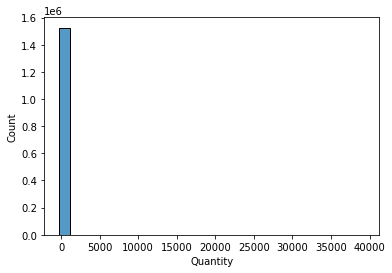

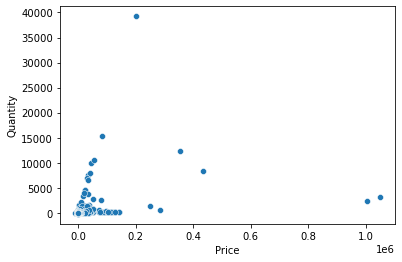

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Quantity distribution
sns.histplot(df['Quantity'], bins=30)
plt.show()

# Relationship between Price and Quantity
sns.scatterplot(x='Price', y='Quantity', data=df)
plt.show()


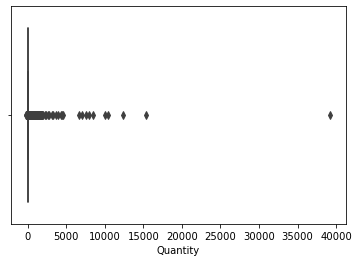

In [12]:
sns.boxplot(x=df['Quantity'])
plt.show()

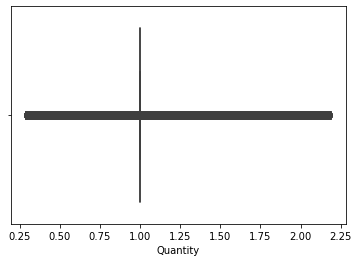

In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

# Verify the removal of outliers
sns.boxplot(x=df_cleaned['Quantity'])
plt.show()


In [14]:
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['year'] = df_cleaned['date'].dt.year


C:\Users\USER\AppData\Local\Temp/ipykernel_22628/3516853083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month'] = df_cleaned['date'].dt.month
C:\Users\USER\AppData\Local\Temp/ipykernel_22628/3516853083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = df_cleaned['date'].dt.year


In [15]:
df_cleaned.loc[:, 'month'] = df_cleaned['date'].dt.month
df_cleaned.loc[:, 'year'] = df_cleaned['date'].dt.year


C:\Users\USER\AppData\Local\Temp/ipykernel_22628/1884584599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'month'] = df_cleaned['date'].dt.month
C:\Users\USER\AppData\Local\Temp/ipykernel_22628/1884584599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'year'] = df_cleaned['date'].dt.year


In [17]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Item_Name', 'outlet', 'sub_category_name'])


In [18]:
print(df_cleaned.describe())

          outlet_id     Item_code    Sub_cat_id      Quantity         Price  \
count  1.316752e+06  1.316752e+06  1.316752e+06  1.316752e+06  1.316752e+06   
mean   1.023013e+04  6.848263e+04  1.544193e+02  1.139032e+00  1.822065e+02   
std    2.908578e+01  2.834892e+05  4.910078e+01  3.563889e-01  2.311614e+02   
min    1.017700e+04  5.538200e+04  3.200000e+01  2.880000e-01  0.000000e+00   
25%    1.021600e+04  5.788500e+04  1.460000e+02  1.000000e+00  5.300000e+01   
50%    1.022300e+04  5.871800e+04  1.540000e+02  1.000000e+00  1.170000e+02   
75%    1.025700e+04  6.941600e+04  1.970000e+02  1.000000e+00  1.800000e+02   
max    1.027200e+04  1.555499e+07  2.160000e+02  2.185000e+00  5.900000e+03   

              month          year  
count  1.316752e+06  1.316752e+06  
mean   6.503954e+00  2.023482e+03  
std    3.220956e+00  5.004221e-01  
min    1.000000e+00  2.022000e+03  
25%    4.000000e+00  2.023000e+03  
50%    7.000000e+00  2.023000e+03  
75%    9.000000e+00  2.024000e+03  


In [19]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Item_Name', 'outlet', 'sub_category_name'])


In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316752 entries, 0 to 1524929
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   date               1316752 non-null  datetime64[ns]
 1   outlet_id          1316752 non-null  int64         
 2   outlet             1316752 non-null  object        
 3   Item_code          1316752 non-null  int64         
 4   Item_Name          1316752 non-null  object        
 5   Sub_cat_id         1316752 non-null  int64         
 6   sub_category_name  1316752 non-null  object        
 7   Quantity           1316752 non-null  float64       
 8   Price              1316752 non-null  float64       
 9   month              1316752 non-null  int64         
 10  year               1316752 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 120.6+ MB


In [21]:
print(df_encoded)

              date  outlet_id  Item_code  Sub_cat_id  Quantity  Price  month  \
0       2024-05-24      10178      69956         154       1.0   95.0      5   
1       2024-05-24      10178      57768         151       1.0  150.0      5   
2       2024-05-24      10178      57768         151       1.0  150.0      5   
3       2024-05-24      10178      57768         151       1.0  150.0      5   
5       2024-05-24      10178      57768         151       1.0  150.0      5   
...            ...        ...        ...         ...       ...    ...    ...   
1524925 2024-07-26      10260      69327         199       1.0  142.0      7   
1524926 2024-07-26      10260      57386         190       1.0   41.0      7   
1524927 2024-07-26      10260      57637         154       2.0  136.0      7   
1524928 2024-07-26      10260      58766         150       1.0  128.0      7   
1524929 2024-07-26      10260      69387         206       1.0   53.0      7   

         year  Item_Name_ Chaad Dishwas

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Define features and target
X = df_encoded.drop(['Quantity', 'date'], axis=1)
y = df_encoded['Quantity']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
